# Predicting Seoul housing deposit

## 1. Data preparation

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# The dataset file was downloaded from https://data.seoul.go.kr/dataList/OA-15549/S/1/datasetView.do
# Import the dataset to a pandas dataframe with the proper encoding for Korean alphabet
df_transactions = pd.read_csv('seoul_lease_transactions_20190916.csv', encoding = 'EUC-KR', dtype = str)

In [2]:
df_transactions

,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,...,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,...,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
1,1111010100100010000,3000136,0000485,2015,11110,종로구,10100,청운동,0001,0000,...,4,다세대/연립,83.61,3,준월세,5000,120,2015,20150703,1988
2,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,...,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
3,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,...,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
4,1111010100100520018,3000136,0000637,2015,11110,종로구,10100,청운동,0052,0018,...,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280916,1150010500107580002,25010,0002340,2018,11500,강서구,10500,마곡동,0758,0002,...,9,오피스텔,21.43,1,전세,13960,0,2018,20180303,2016
3280917,1150010500107730000,25010,0002356,2018,11500,강서구,10500,마곡동,0773,0000,...,9,오피스텔,19.87,3,준월세,2000,47,2018,20180301,2017
3280918,1150010200106410010,25010,0002371,2018,11500,강서구,10200,등촌동,0641,0010,...,9,오피스텔,14.53,1,전세,13800,0,2018,20180303,2018
3280919,1150010500107600001,25010,0002427,2018,11500,강서구,10500,마곡동,0760,0001,...,9,오피스텔,20.84,3,준월세,3000,38,2018,20180303,2017


We retrieved a total of over 3 million transactions.

Translate the columns into English.

In [3]:
df_transactions.columns

Index(['지번코드', '기관코드', '일련번호', '접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '본번',
       '부번', '건물명', '층', '임대건물코드', '임대건물명', '임대면적', '전월세구분코드', '전월세구분', '보증금',
       '임대료', '계약년도', '계약일자', '건축년도'],
      dtype='object')

In [4]:
df_transactions = df_transactions.rename(columns={'지번코드': 'Lot code',
                                                  '기관코드': 'Institution code',
                                                  '일련번호' : 'Serial number',
                                                  '접수년도' : 'Collection year',
                                                  '자치구코드' : 'District code',
                                                  '자치구명' : 'District name',
                                                  '법정동코드' : 'Neighborhood code',
                                                  '법정동명' : 'Neighborhood name',
                                                  '본번' : 'Lot number 1',
                                                  '부번' : 'Lot number 2',
                                                  '건물명' : 'Building name',
                                                  '층' : 'Floor',
                                                  '임대건물코드' : 'Lease building code',
                                                  '임대건물명' : 'Lease building name',
                                                  '임대면적' : 'Floor area',
                                                  '전월세구분코드' : 'Lease type code',
                                                  '전월세구분' : 'Lease type',
                                                  '보증금' : 'Key money',
                                                  '임대료' : 'Rent',
                                                  '계약년도' : 'Transaction year',
                                                  '계약일자' : 'Transaction date',
                                                  '건축년도' : 'Construction year',
                                                 })

In [5]:
df_transactions

,Lot code,Institution code,Serial number,Collection year,District code,District name,Neighborhood code,Neighborhood name,Lot number 1,Lot number 2,...,Lease building code,Lease building name,Floor area,Lease type code,Lease type,Key money,Rent,Transaction year,Transaction date,Construction year
0,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,...,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
1,1111010100100010000,3000136,0000485,2015,11110,종로구,10100,청운동,0001,0000,...,4,다세대/연립,83.61,3,준월세,5000,120,2015,20150703,1988
2,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,...,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
3,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,...,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
4,1111010100100520018,3000136,0000637,2015,11110,종로구,10100,청운동,0052,0018,...,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280916,1150010500107580002,25010,0002340,2018,11500,강서구,10500,마곡동,0758,0002,...,9,오피스텔,21.43,1,전세,13960,0,2018,20180303,2016
3280917,1150010500107730000,25010,0002356,2018,11500,강서구,10500,마곡동,0773,0000,...,9,오피스텔,19.87,3,준월세,2000,47,2018,20180301,2017
3280918,1150010200106410010,25010,0002371,2018,11500,강서구,10200,등촌동,0641,0010,...,9,오피스텔,14.53,1,전세,13800,0,2018,20180303,2018
3280919,1150010500107600001,25010,0002427,2018,11500,강서구,10500,마곡동,0760,0001,...,9,오피스텔,20.84,3,준월세,3000,38,2018,20180303,2017


Filter the dataframe to retain only a single type of lease (the most common type in our data : Jeonse) and only transactions concluded between 2016 and 2019

In [6]:
# Rental type = Jeonse
df_transactions = df_transactions[df_transactions['Lease type'] == '전세']

# Transactions between 2016 and 2019
df_transactions = df_transactions[(df_transactions['Transaction year'] < '2020') & (df_transactions['Transaction year'] > '2015')]

In [7]:
df_transactions.shape

(815147, 22)

The number of rows has dropped from 3 million to around 815 000.

Drop all the columns we don't need.

In [8]:
df_transactions = df_transactions.drop(columns={'Lot code', 'Institution code', 'Serial number', 'Collection year', 'District code', 'Neighborhood code', 'Neighborhood name', 'Lot number 1', 'Lot number 2', 'Building name', 'Lease building code', 'Lease building name', 'Lease type code', 'Lease type', 'Rent', 'Transaction year', 'Transaction date'})

In [9]:
df_transactions

,District name,Floor,Floor area,Key money,Construction year
18,종로구,1,129.27,38000,1989
19,종로구,2,73.98,40000,2001
20,종로구,2,141.39,55000,1988
22,종로구,1,75.36,29000,2002
23,종로구,3,83.61,40000,1988
...,...,...,...,...,...
3280913,강서구,7,19.87,14000,2017
3280914,영등포구,3,38.06,24500,NaN
3280915,강서구,13,23.39,12600,2016
3280916,강서구,4,21.43,13960,2016


Identify any null value

In [10]:
df_transactions.isna().sum()

District name            13
Floor                203979
Floor area                0
Key money                 0
Construction year     11815
dtype: int64

### Impute missing data

Over 200 000 rows have the floor unspecified. We will impute the missing data with the most common floor.
What are the most common floors in our dataset?

In [11]:
df_transactions['Floor'].value_counts().head()

2    80088
3    78869
4    68489
5    54046
1    41840
Name: Floor, dtype: int64

Apartments located on the 2nd floor are the most common.

Impute 2 to the missing values. 

In [12]:
df_transactions['Floor'] = df_transactions['Floor'].fillna(2)

### Convert columns types

In [13]:
df_transactions.dtypes

District name        object
Floor                object
Floor area           object
Key money            object
Construction year    object
dtype: object

Convert numerical columns to numerical data type, and remove the values that can't be converted (erroneous values).

In [14]:
# 4 numerical columns : Floor, Floor area, Key money, Construction year
df_transactions[['Floor', 'Floor area', 'Key money', 'Construction year']] = df_transactions[['Floor', 'Floor area', 'Key money', 'Construction year']].apply(pd.to_numeric, errors='coerce')

# Remove null values
df_transactions = df_transactions.dropna().reset_index(drop=True)

# Convert floats to integers to get rid of decimals
df_transactions[['Floor', 'Floor area', 'Key money', 'Construction year']] = df_transactions[['Floor', 'Floor area', 'Key money', 'Construction year']].astype(int)

In [15]:
df_transactions.dtypes

District name        object
Floor                 int32
Floor area            int32
Key money             int32
Construction year     int32
dtype: object

In [16]:
df_transactions.shape

(803319, 5)

### Remove outliers

In [17]:
df_transactions.describe()

,Floor,Floor area,Key money,Construction year
count,803319.000000,803319.000000,803319.000000,803319.000000
mean,5.778403,58.849191,27346.544800,2000.372314
std,5.331863,30.255532,21644.955548,13.938177
min,-3.000000,0.000000,100.000000,991.000000
25%,2.000000,36.000000,12500.000000,1992.000000
50%,4.000000,57.000000,21000.000000,2001.000000
75%,8.000000,83.000000,37000.000000,2011.000000
max,68.000000,1049.000000,500000.000000,7811.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225900A1148>,
      dtype=object)

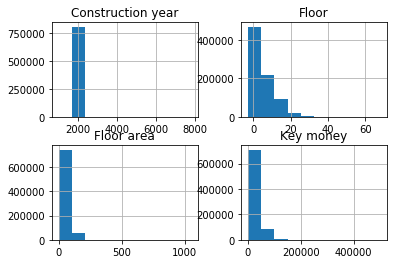

In [18]:
df_transactions.hist()

We can spot wrong values for construction year, and extreme values for floor area and key money.

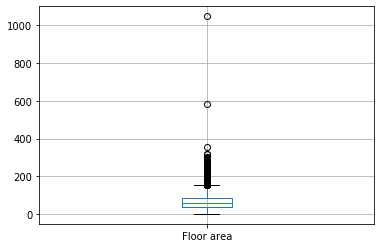

In [19]:
df_transactions.boxplot(column = ['Floor area'])

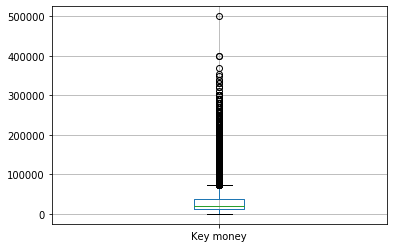

In [20]:
df_transactions.boxplot(column = ['Key money'])

We will use the 1.5 * IQR rule to remove outliers.

In [21]:
# Function to compute the lower range and upper range of values to keep (1.5 x IQR)
def range_keep(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile (interquartile range)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [22]:
# Compute the lower range and upper range for column 'Key money'
lower_range, upper_range = range_keep(df_transactions['Key money'])
print(lower_range, upper_range)

# Keep only values that lie between that range
df_transactions = df_transactions.drop(df_transactions[(df_transactions['Key money'] > upper_range) | (df_transactions['Key money'] < lower_range)].index)

# Compute the lower range and upper range for column 'Floor area'
lower_range, upper_range = range_keep(df_transactions['Floor area'])
print(lower_range, upper_range)

# Keep only values that lie between that range
df_transactions = df_transactions.drop(df_transactions[(df_transactions['Floor area'] > upper_range) | (df_transactions['Floor area'] < lower_range)].index)

-24250.0 73750.0
-31.0 145.0


In [23]:
df_transactions.shape

(768764, 5)

Lower ranges are all negative, which mean we didn't remove any unusually low floor area

In [24]:
# Remove floor areas under 10 squared meters
df_transactions = df_transactions[df_transactions['Floor area'] >= 10]

# Keep only floors between -1 and 39
df_transactions = df_transactions[df_transactions['Floor'] < 40]
df_transactions = df_transactions[df_transactions['Floor'] >= -1]

# Remove erroneous or extremely low construction years
df_transactions = df_transactions[df_transactions['Construction year'] <= 2019]
df_transactions = df_transactions[df_transactions['Construction year'] > 1950]

In [25]:
df_transactions.shape

(768140, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002259043B3C8>,
      dtype=object)

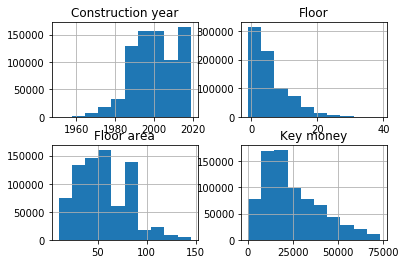

In [26]:
df_transactions.hist()

Histograms look much more "balanced" now.

### Look for correlations between features

Compute the standard correlation coefficient (Pearson's r) between every pair of attributes.

In [27]:
df_transactions.corr()

,Floor,Floor area,Key money,Construction year
Floor,1.000000,0.291287,0.469647,0.119440
Floor area,0.291287,1.000000,0.706827,-0.205793
Key money,0.469647,0.706827,1.000000,0.100242
Construction year,0.119440,-0.205793,0.100242,1.000000


Now check how much each feature correlates with the target.

In [29]:
df_transactions.corr()['Key money'].sort_values(ascending = False)

Key money            1.000000
Floor area           0.706827
Floor                0.469647
Construction year    0.100242
Name: Key money, dtype: float64

As we could expect, the amount of key money is highly correlated with floor area. Let's visualize this relation on a graph.

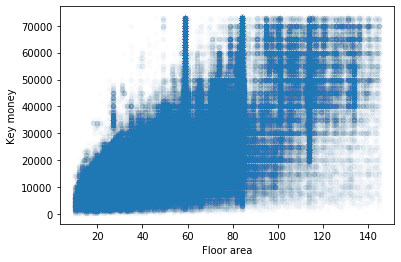

In [34]:
df_transactions.plot.scatter('Floor area', 'Key money', alpha = 0.01)

We can see a general upward trend.

Let's plot every numerical attribute against others.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225BFCB85C8>,
      dtype=object)

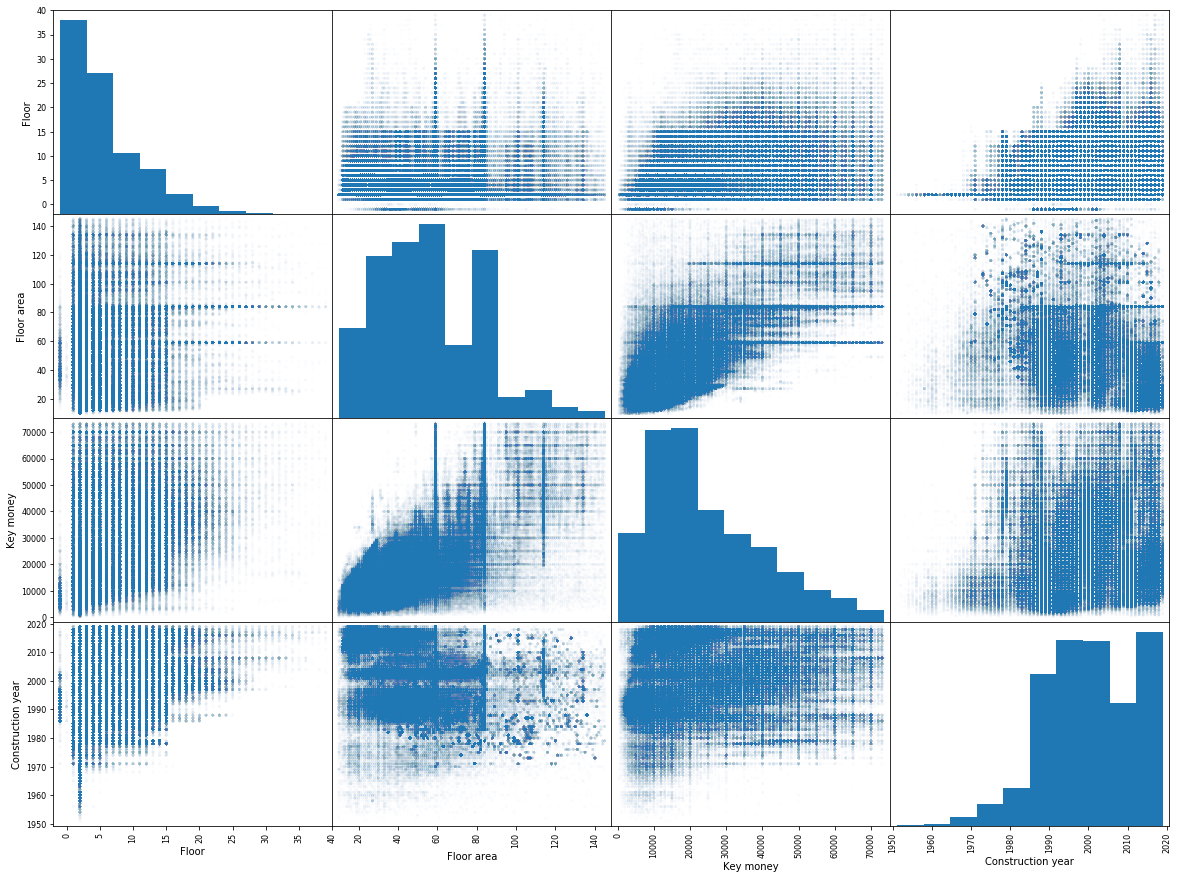

In [47]:
pd.plotting.scatter_matrix(df_transactions, figsize =(20,15), alpha = 0.01)

### Transcript district names into English

In [28]:
df_transactions['District name'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [29]:
target_values = {
    '종로구': 'Jongno',
    '중구': 'Jung',
    '용산구': 'Yongsan',
    '성동구': 'Seongdong',
    '광진구': 'Gwangjin',
    '동대문구': 'Dongdaemun',
    '중랑구': 'Jungnang',
    '성북구': 'Seongbuk',
    '강북구': 'Gangbuk',
    '도봉구': 'Dobong',
    '노원구': 'Nowon',
    '은평구': 'Eunpyeong',
    '서대문구': 'Seodaemun',
    '마포구': 'Mapo',
    '양천구': 'Yangcheon',
    '강서구': 'Gangseo',
    '구로구': 'Guro',
    '금천구': 'Geumcheon',
    '영등포구': 'Yeongdeungpo',
    '동작구': 'Dongjak',
    '관악구': 'Gwanak',
    '서초구': 'Seocho',
    '강남구': 'Gangnam',
    '송파구': 'Songpa',
    '강동구': 'Gangdong',
    }

for k, v in target_values.items():
    df_transactions.loc[df_transactions['District name'] == k, 'District name'] = v

In [30]:
df_transactions

,District name,Floor,Floor area,Key money,Construction year
0,Jongno,1,129,38000,1989
1,Jongno,2,73,40000,2001
2,Jongno,2,141,55000,1988
3,Jongno,1,75,29000,2002
4,Jongno,3,83,40000,1988
...,...,...,...,...,...
803314,Yeongdeungpo,5,39,17000,2017
803315,Gangseo,7,19,14000,2017
803316,Gangseo,13,23,12600,2016
803317,Gangseo,4,21,13960,2016


### Convert the categorical feature to dummy variables

Automatically generate dummy variables from the columns 'District name'

In [360]:
dummy_district = pd.get_dummies(df_transactions['District name'])
dummy_district

,Dobong,Dongdaemun,Dongjak,Eunpyeong,Gangbuk,Gangdong,Gangnam,Gangseo,Geumcheon,Guro,...,Mapo,Nowon,Seocho,Seodaemun,Seongbuk,Seongdong,Songpa,Yangcheon,Yeongdeungpo,Yongsan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
803315,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
803316,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
803317,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Concatenate the original dataframe with the dummy variables

In [361]:
df_transactions_dummy = pd.concat([df_transactions, dummy_district], axis = 1)

Drop the original 'District name' column

In [362]:
df_transactions_dummy = df_transactions_dummy.drop(columns={'District name'}).reset_index(drop=True)
df_transactions_dummy

,Floor,Floor area,Key money,Construction year,Dobong,Dongdaemun,Dongjak,Eunpyeong,Gangbuk,Gangdong,...,Mapo,Nowon,Seocho,Seodaemun,Seongbuk,Seongdong,Songpa,Yangcheon,Yeongdeungpo,Yongsan
0,1,129,38000,1989,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,73,40000,2001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,141,55000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75,29000,2002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,83,40000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768135,5,39,17000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
768136,7,19,14000,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768137,13,23,12600,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768138,4,21,13960,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save the dataframe to a file

In [363]:
# Save the data frame to a file
df_transactions_dummy.to_pickle('df_transactions_dummy.pkl')